# Analysis of the relationship between percent of opioid prescriptions and percent of deaths/deaths per 100K that are opioid ODs

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
# Read state_summary_df.csv file
cms_df=pd.read_csv('data/state_summary_df.csv')
cms_df.head()

,State,Total Providers,Total Rx,Total Opioid Rx,Average Opioid Rx,Number of Top Providers
0,AK,1623,1062952,75776,7.128826,19
1,AL,11365,25804989,2042805,7.916318,146
2,AR,6802,16607909,1124700,6.772075,86
3,AZ,16558,22004918,1534577,6.973791,285
4,CA,85888,123983374,6702051,5.405605,602


In [2]:
# Read 55+data.csv and isolate 2017 data
od_df=pd.read_csv('data/55+data.csv')
od_df=od_df.loc[od_df['Year']==2017]

In [3]:
# Add column for state name abbreviations
def convert_state(name):
    if name=="Alabama": return "AL"
    elif name=='Alaska': return "AK"
    elif name=="Arizona": return 'AZ'
    elif name=='Arkansas': return 'AR'
    elif name=='California': return 'CA'
    elif name=='Colorado': return 'CO'
    elif name=='Connecticut': return 'CT'
    elif name=='Distrcit of Columbia': return 'DC'
    elif name=='Delaware': return 'DE'
    elif name=='Florida': return 'FL'
    elif name=='Georgia': return 'GA'
    elif name=='Hawaii': return 'HI'
    elif name=='Idaho': return 'ID'
    elif name=='Illinois': return 'IL'
    elif name=='Indiana': return 'IN'
    elif name=='Iowa': return 'IA'
    elif name=='Kansas': return 'KS'
    elif name=='Kentucky': return 'KY'
    elif name=='Louisiana': return 'LA'
    elif name=='Maine': return 'ME'
    elif name=='Maryland': return 'MD'
    elif name=='Massachusetts': return 'MA'
    elif name=='Michigan': return 'MI'
    elif name=='Minnesota': return 'MN'
    elif name=='Mississippi': return 'MS'
    elif name=='Missouri': return 'MO'
    elif name=='Montana': return 'MT'
    elif name=='Nebraska': return 'NE'
    elif name=='Nevada': return 'NV'
    elif name=='New Hampshire': return 'NH'
    elif name=='New Jersey': return 'NJ'
    elif name=='New Mexico': return 'NM'
    elif name=='New York': return 'NY'
    elif name=='North Carolina': return 'NC'
    elif name=='North Dakota': return 'ND'
    elif name=='Ohio': return 'OH'
    elif name=='Oklahoma': return 'OK'
    elif name=='Oregon': return 'OR'
    elif name=='Pennsylvania': return 'PA'
    elif name=='Rhode Island': return 'RI'
    elif name=='South Carolina': return 'SC'
    elif name=='South Dakota': return 'SD'
    elif name=='Tennessee': return 'TN'
    elif name=='Texas': return 'TX'
    elif name=='Utah': return 'UT'
    elif name=='Vermont': return 'VT'
    elif name=='Virginia': return 'VA'
    elif name=='Washington': return 'WA'
    elif name=='West Virginia': return 'WV'
    elif name=='Wisconsin': return 'WI'
    elif name=='Wyoming': return 'WY'
    else: return "missing"

od_df['abbrev'] = od_df['State'].apply(convert_state)
od_df=od_df.rename(columns={'State':'State_long'})
od_df=od_df.rename(columns={'abbrev':'State'})
od_df

,Age_Group,State_long,Year,Deaths,Population,KFF_opioid_deaths,%_opioid_deaths,State
8,55+,Alabama,2017,45374,1366137,72.0,0.158681,AL
24,55+,Arizona,2017,49715,1911272,228.0,0.458614,AZ
34,55+,Arkansas,2017,27939,823118,38.0,0.136011,AR
44,55+,California,2017,234073,9535243,671.0,0.286663,CA
54,55+,Colorado,2017,32408,1392254,124.0,0.382622,CO
64,55+,Connecticut,2017,27868,1020274,164.0,0.588489,CT
70,55+,Delaware,2017,7945,287838,38.0,0.478288,DE
86,55+,Florida,2017,178884,6456711,587.0,0.328146,FL
96,55+,Georgia,2017,69755,2528775,181.0,0.259480,GA
103,55+,Hawaii,2017,10012,396291,27.0,0.269676,HI


In [4]:
# Merge two dataframes together
merge_df=pd.merge(od_df,cms_df,on='State', how="outer")
# Drop states missing data
merge_df=merge_df.dropna(how='any')
merge_df

,Age_Group,State_long,Year,Deaths,Population,KFF_opioid_deaths,%_opioid_deaths,State,Total Providers,Total Rx,Total Opioid Rx,Average Opioid Rx,Number of Top Providers
0,55+,Alabama,2017.0,45374.0,1366137.0,72.0,0.158681,AL,11365,25804989,2042805,7.916318,146
1,55+,Arizona,2017.0,49715.0,1911272.0,228.0,0.458614,AZ,16558,22004918,1534577,6.973791,285
2,55+,Arkansas,2017.0,27939.0,823118.0,38.0,0.136011,AR,6802,16607909,1124700,6.772075,86
3,55+,California,2017.0,234073.0,9535243.0,671.0,0.286663,CA,85888,123983374,6702051,5.405605,602
4,55+,Colorado,2017.0,32408.0,1392254.0,124.0,0.382622,CO,14406,15259860,1108954,7.267131,121
5,55+,Connecticut,2017.0,27868.0,1020274.0,164.0,0.588489,CT,11854,14270680,623160,4.366716,71
6,55+,Delaware,2017.0,7945.0,287838.0,38.0,0.478288,DE,2462,3431363,218573,6.369859,47
7,55+,Florida,2017.0,178884.0,6456711.0,587.0,0.328146,FL,53917,94773889,5511391,5.815305,682
8,55+,Georgia,2017.0,69755.0,2528775.0,181.0,0.259480,GA,21427,42915089,2758258,6.427245,280
9,55+,Hawaii,2017.0,10012.0,396291.0,27.0,0.269676,HI,3021,3473916,151575,4.363232,15


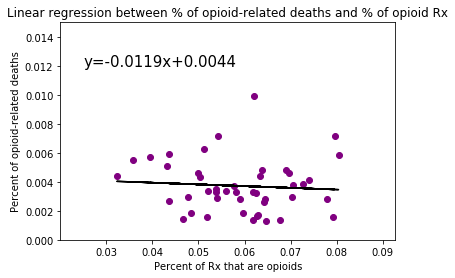

In [5]:
# Add columns with calculations
merge_df['opioid_rx_pct']=merge_df['Total Opioid Rx']/merge_df['Total Rx']
merge_df['opioid_od_pct']=merge_df['KFF_opioid_deaths']/merge_df['Deaths']
# Set x and y values
x_values=merge_df['opioid_rx_pct']
y_values=merge_df['opioid_od_pct']
# Calculate values for linear regression plot
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,4))+"x+"+str(round(intercept,4))
# Plot scatter plot and linear regression line with equation
plt.scatter(x_values,y_values,color='purple')
plt.plot(x_values,regress_values,"r-",color="black")
plt.annotate(line_eq,(.025,.012), fontsize=15,color="black")
plt.ylim(0,.015)
plt.title("Linear regression between % of opioid-related deaths and % of opioid Rx")
plt.xlabel("Percent of Rx that are opioids")
plt.ylabel("Percent of opioid-related deaths")
plt.savefig("visualizations/death_vs_rx.png")
plt.show()

In [6]:
# Calculate correlation coefficient
correlation=st.pearsonr(merge_df['opioid_rx_pct'],merge_df['opioid_od_pct'])
print(f"The correlation between percent of prescriptions that are opioids and percent of deaths that are opioid ODs is {round(correlation[0],2)}.")

The correlation between percent of prescriptions that are opioids and percent of deaths that are opioid ODs is -0.08.


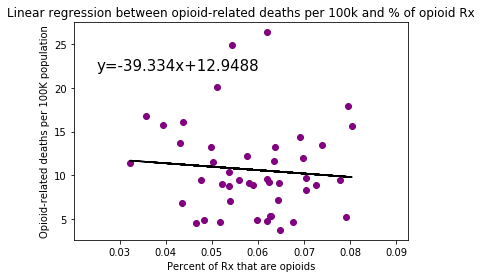

In [7]:
# Add columns with calculations
merge_df['opioid_rx_pct']=merge_df['Total Opioid Rx']/merge_df['Total Rx']
merge_df['opioid_od_100k']=(merge_df['KFF_opioid_deaths']/merge_df['Population'])*100000
x_values=merge_df['opioid_rx_pct']
y_values=merge_df['opioid_od_100k']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values=x_values*slope+intercept
line_eq="y="+str(round(slope,4))+"x+"+str(round(intercept,4))
plt.scatter(x_values,y_values,color='purple')
plt.plot(x_values,regress_values,"r-",color="black")
plt.annotate(line_eq,(.025,22), fontsize=15,color="black")
plt.title("Linear regression between opioid-related deaths per 100k and % of opioid Rx")
plt.xlabel("Percent of Rx that are opioids")
plt.ylabel("Opioid-related deaths per 100K population")
plt.savefig("visualizations/death_100k_vs_rx.png")
plt.show()